In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

# Dataset AI4I 2020 - predictive Maintainance
read data

In [2]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00601/'

In [3]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'

--2022-11-22 02:13:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 522048 (510K) [application/x-httpd-php]
Saving to: ‘ai4i2020.csv’

ai4i2020.csv        100%[===================>] 509.81K   789KB/s    in 0.6s    

2022-11-22 02:13:10 (789 KB/s) - ‘ai4i2020.csv’ saved [522048/522048]



In [4]:
file='ai4i2020.csv'
df=pd.read_csv(file)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

#### Data Explanation
UID: unique identifier ranging from 1 to 10000

**product ID:** consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number

air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

คำอธิบายของ Faliure Type (เป็น Category)

***tool wear failure (TWF):*** the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

***heat dissipation failure (HDF):*** ***bold text*** heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.

power failure (PWF): ***bold text*** the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset. 

overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

***random failures (RNF):*** each process has a chance of 0,1 % to fail regardless of its process parameters.

## Data Exploration

In [6]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


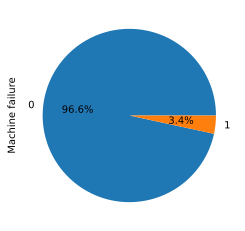

In [7]:
df['Machine failure'].value_counts().plot(kind='pie', autopct='%1.1f%%')

According from dataset, the Machine trend to be failed at 3.4%

In [8]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [9]:
sns.pairplot(data=df.drop(['UDI','TWF','HDF','PWF','OSF','RNF'],axis=1).sample(2000),
             hue='Type',
             plot_kws={'size':6, 'alpha':0.6},
             corner=True)
plt.show()

In [10]:
sns.pairplot(data=df.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1).sample(2000),
             hue='Machine failure',
             plot_kws={'size':6, 'alpha':0.6},
             corner=True)
plt.show()

In [11]:
def plot_Histogram(data,col1,col2):
    sns.FacetGrid(data, hue=col2, height=5) \
   .map(sns.distplot, col1) \
   .add_legend();
    plt.title(col1+' distribution plot')
    plt.show();

In [12]:
def plot_PDF_CDF(data1,data2,col1):
    inc1, bin_edges = np.histogram(data1[col1], bins=10, 
                                 density = True)
    pdf = inc1/(sum(inc1))
    print("PDF and BIN Edges for " + col1 + "feature")
    print(pdf);
    print(bin_edges);
    print()
    plt.plot(bin_edges[1:],pdf,label='PDF_rotational_speed_greater');
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], cdf,label='CDF_rotational_speed_greater')

    inc2, bin_edges = np.histogram(data2[col1], bins=10, 
                                 density = True)
    pdf = inc2/(sum(inc2))
    print("PDF and BIN Edges for " + col1 + "feature")
    print(pdf);
    print(bin_edges);
    print()
    plt.plot(bin_edges[1:],pdf,label='PDF_rotational_speed_lesser');
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], cdf,label='CDF_rotational_speed_lesser')
    
    plt.xlabel(col1)
    plt.ylabel('')
    plt.legend()
    plt.show();

In [13]:
df['Type']

0       M
1       L
2       L
3       L
4       L
       ..
9995    M
9996    H
9997    M
9998    H
9999    M
Name: Type, Length: 10000, dtype: object

In [14]:
large_machinery = df[df['Type'] == 'H']
medium_machinery = df[df['Type'] == 'M']
low_machinery = df[df['Type'] == 'L']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

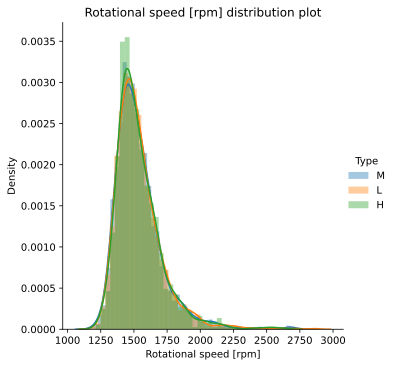

PDF and BIN Edges for Rotational speed [rpm]feature
[0.06380857 0.42671984 0.30508475 0.1226321  0.04985045 0.01595214
 0.00897308 0.00099701 0.00199402 0.00398804]
[1212.  1354.4 1496.8 1639.2 1781.6 1924.  2066.4 2208.8 2351.2 2493.6
 2636. ]

PDF and BIN Edges for Rotational speed [rpm]feature
[0.04004004 0.38171505 0.36269603 0.1354688  0.04738071 0.01768435
 0.00834168 0.00233567 0.00133467 0.003003  ]
[1168.  1322.2 1476.4 1630.6 1784.8 1939.  2093.2 2247.4 2401.6 2555.8
 2710. ]



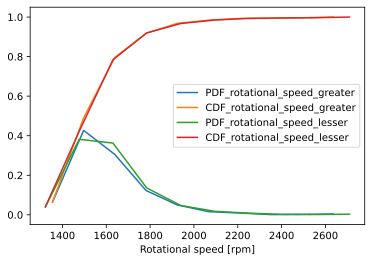

In [15]:
plot_Histogram(df,'Rotational speed [rpm]','Type')
plot_PDF_CDF(large_machinery,medium_machinery,'Rotational speed [rpm]')

In [16]:
df[df['Machine failure']==1][['TWF','HDF','PWF','OSF','RNF']].apply(pd.value_counts)

,TWF,HDF,PWF,OSF,RNF
0,293,224,244,241,338
1,46,115,95,98,1


## Feature Analysis

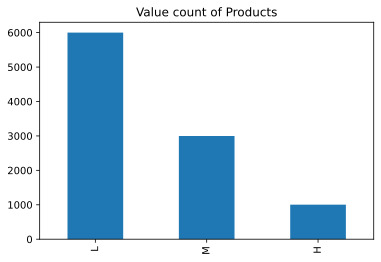

Count of values for Type featue:
 Type  Machine failure
L     0                  5765
M     0                  2914
H     0                   982
L     1                   235
M     1                    83
H     1                    21
dtype: int64


In [17]:
df['Type'].value_counts().plot(kind='bar', stacked=True, title='Value count of Products')
#plt.title('Value count of Products')
plt.show()

print("Count of values for Type featue:\n",df[['Type','Machine failure']].value_counts())

In [18]:
a=df[df['Machine failure']==1]['Machine failure'].value_counts()
b=df[df['Machine failure']==0]['Machine failure'].value_counts()
Failure_Percentage = a.values[0]/b.values[0]
print('Failure Percentage : {:.2}'.format(Failure_Percentage*100))

Failure Percentage : 3.5


In [19]:
sns.pairplot(data=df.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1).sample(1000),
             hue='Machine failure',
             plot_kws={'size':6, 'alpha':0.6},
             corner=True)
plt.show()

In [20]:
!pip install catboost
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 122 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 4.1 MB/s 
     |████████████████████████████████| 81 kB 6.0 MB/s 
     |████████████████████████████████| 209 kB 48.6 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 50 kB 4.3 MB/s 
     |████████████████████████████████| 147 kB 57.1 MB/s 
     |████████████████████████████████| 112 kB 55.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=06ef740e669979ac7e0678130ee37f41722b8e01699fe8c1d7258545dcae1c59
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [21]:
import os
import time
import joblib
from functools import partial, wraps

import numpy as np
import pandas as pd

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_ex=df

In [24]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [25]:
df_ex['TWF']=df_ex['TWF'].astype('category')

In [26]:
df_ex2=df_ex.astype({'TWF':'category','HDF':'category' })

In [27]:
df_ex2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   UDI                      10000 non-null  int64   
 1   Product ID               10000 non-null  object  
 2   Type                     10000 non-null  object  
 3   Air temperature [K]      10000 non-null  float64 
 4   Process temperature [K]  10000 non-null  float64 
 5   Rotational speed [rpm]   10000 non-null  int64   
 6   Torque [Nm]              10000 non-null  float64 
 7   Tool wear [min]          10000 non-null  int64   
 8   Machine failure          10000 non-null  int64   
 9   TWF                      10000 non-null  category
 10  HDF                      10000 non-null  category
 11  PWF                      10000 non-null  int64   
 12  OSF                      10000 non-null  int64   
 13  RNF                      10000 non-null  int64   
dtypes: cate

In [28]:
for i in df_ex.columns[8:]:
  print(i)

Machine failure
TWF
HDF
PWF
OSF
RNF


In [29]:
for i in df_ex.columns[8:]:
  df_ex[i]=df_ex[i].astype('category')

In [30]:
df_ex

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df, shuffle=True, test_size=0.3)

ValueError: ignored

In [ ]:
df.head()

In [ ]:
df['Product ID'].nunique()